# DS-GA 1007 - Programming for Data Science
## Course Project - Fall 2022 - Professor Jeremy Curuksu 
## Group "Pip Install Grade A"

__Students:__ Chloe Zheng (cz1300@nyu.edu) and Rodrigo Kreis de Paula (rk4197@nyu.edu) <br>

All meterials for this Project are available on the <a href="https://github.com/rk4197/DS-GA_1007_Project" target="_blank">GitHub Repo</a>.

<div class="alert alert-block alert-info">
<b>Important Information</b> 

All the datafiles we'll use during this Project were obtained on <a href="https://www.nyc.gov/site/finance/taxes/property-annualized-sales-update.page" target="_blank">this link</a>. We downloaded 100 files in total: one file per NYC borough, per year. Since there are 5 boroughs (Manhattan, Queens, Brooklyn, Bronx and Staten Island) and our analysis encompass 20 years (2003 - 2022), there were 100 Excel files in total.
    
<br> 
We then transformed each Excel file into CSV files and concatenated all of them using the Jupyter Notebook, generating a single file called "data.csv" that we'll use during the project. This file can be also downloaded on the <a href="https://drive.google.com/file/d/1RkUYtr-iBkwJdaLfi36j8cWXMIvuF9Dr/view?usp=sharing" target="_blank">Google Shared Folder</a> we created for this Project. <br>
<br>
Finally, it is import to mention that the data corresponding to 2022 goes until October (inclusive), which is the latest publicly available information. <br>
<br>
For more information about the data, please check the following publicly available documents:<br>
* Glossary of Terms for Property Sales Files (link <a href="https://www.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf"> here)</a>. <br>
* NYC Building Class Code Descriptions (link <a href="https://www.nyc.gov/assets/finance/jump/hlpbldgcode.html"> here)</a>.

</div>

### Section I - Setting up

In [268]:
# importing packages to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [269]:
# importing data
filepath = '../data/' # modify the filepath accordingly
file = 'data.csv' # modify the data name accordingly

data = pd.read_csv(f'{filepath}{file}')

/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_12374/2736468084.py:5: DtypeWarning: Columns (7,12,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f'{filepath}{file}')


### Section II - Data Preview

In [270]:
# getting the total number of rows and attributes (columns)
data.shape

(1845520, 22)

In [271]:
# showing the first five rows
data.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,0,1.0,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,376.0,43.0,NaN,S1,743 EAST 6TH STREET,...,1.0,1.0,2.0,2090.0,3680.0,1940.0,1.0,S1,3200000.0,2019-07-24
1,1,1.0,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390.0,61.0,NaN,A4,189 EAST 7TH STREET,...,1.0,0.0,1.0,987.0,2183.0,1860.0,1.0,A4,0.0,2019-09-25
2,2,1.0,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404.0,1.0,NaN,B9,166 AVENUE A,...,2.0,0.0,2.0,1510.0,4520.0,1900.0,1.0,B9,0.0,2019-07-22
3,3,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377.0,56.0,NaN,C0,263 EAST 7TH STREET,...,3.0,0.0,3.0,2430.0,3600.0,1899.0,1.0,C0,6300000.0,2019-04-30
4,4,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,393.0,9.0,NaN,C0,604 EAST 11TH STREET,...,3.0,0.0,3.0,2375.0,5110.0,1939.0,1.0,C0,0.0,2019-10-24


In [272]:
# showing the last five rows
data.tail(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1845515,18192,1.0,UPPER EAST SIDE (79-96),13 CONDOS - ELEVATOR APARTMENTS,2,1528.0,1010.0,NaN,R4,"200 EAST 83RD STREET, 4D",...,1,NaN,1,NaN,NaN,2021.0,2.0,R4,"2,331,793",2022-10-31
1845516,18193,1.0,UPPER WEST SIDE (59-79),10 COOPS - ELEVATOR APARTMENTS,2,1120.0,17.0,NaN,D4,"17 WEST 67TH STREET, 10A",...,NaN,NaN,NaN,NaN,NaN,1930.0,2.0,D4,"1,100,000",2022-10-31
1845517,18194,1.0,UPPER WEST SIDE (59-79),10 COOPS - ELEVATOR APARTMENTS,2,1185.0,32.0,NaN,D4,"320 WEST 76 STREET, 5A",...,NaN,NaN,NaN,NaN,NaN,1948.0,2.0,D4,"730,000",2022-10-31
1845518,18195,1.0,UPPER WEST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,1151.0,1334.0,NaN,R4,"555 WEST 59TH, 7G",...,1,NaN,1,NaN,NaN,2007.0,2.0,R4,"1,703,000",2022-10-31
1845519,18196,1.0,UPPER WEST SIDE (96-116),17 CONDO COOPS,2,1883.0,1002.0,NaN,R9,"545 WEST 111TH STREET, 5B",...,NaN,NaN,NaN,NaN,NaN,1930.0,2.0,R9,"1,370,000",2022-10-31


In [273]:
# we see that there are some columns that were not shown. Let's exhibit all of them
data.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

### Section III - Data Manipulation & Cleaning

In [274]:
# first, let's delete the first column named 'Unnamed: 0' which does not contain any information
del data['Unnamed: 0']

In [275]:
# printing the new shape after deleting the column
data.shape

(1845520, 21)

__Now we have 21 attributes (including the dependent variable 'SALES PRICE'), in accordance to the data information publicly available. Also, we note that there are 1.84 mm registers in total.__

In [276]:
# let's obtain more information about the types of each attribute
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845520 entries, 0 to 1845519
Data columns (total 21 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   BOROUGH                         float64
 1   NEIGHBORHOOD                    object 
 2   BUILDING CLASS CATEGORY         object 
 3   TAX CLASS AT PRESENT            object 
 4   BLOCK                           float64
 5   LOT                             float64
 6   EASE-MENT                       object 
 7   BUILDING CLASS AT PRESENT       object 
 8   ADDRESS                         object 
 9   APARTMENT NUMBER                object 
 10  ZIP CODE                        float64
 11  RESIDENTIAL UNITS               object 
 12  COMMERCIAL UNITS                float64
 13  TOTAL UNITS                     object 
 14  LAND SQUARE FEET                object 
 15  GROSS SQUARE FEET               object 
 16  YEAR BUILT                      float64
 17  TAX CLASS AT TIME OF SALE  

In [277]:
# we'll convert the columns to best possible dtypes using dtypes
data.convert_dtypes().dtypes

BOROUGH                            Int64
NEIGHBORHOOD                      string
BUILDING CLASS CATEGORY           string
TAX CLASS AT PRESENT              string
BLOCK                              Int64
LOT                                Int64
EASE-MENT                         string
BUILDING CLASS AT PRESENT         string
ADDRESS                           string
APARTMENT NUMBER                  string
ZIP CODE                           Int64
RESIDENTIAL UNITS                 object
COMMERCIAL UNITS                   Int64
TOTAL UNITS                       object
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         Int64
TAX CLASS AT TIME OF SALE          Int64
BUILDING CLASS AT TIME OF SALE    string
SALE PRICE                        object
SALE DATE                         string
dtype: object

In [278]:
# we note, however, that the attribute 'SALE DATE' was not changed to datetime64. So, we'll do it manually
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'])

In [279]:
# let's also add the 'SALE YEAR' and 'SALE MONTH'

data["SALE YEAR"] = data["SALE DATE"].dt.year.values
data["SALE MONTH"] = data["SALE DATE"].dt.month_name().values

In [280]:
# also the attribute 'SALE PRICE' has not changed to float. We'll do this manually

for i, price in enumerate(data["SALE PRICE"]):
    if type(data["SALE PRICE"][i]) == str:
        data["SALE PRICE"].loc[i] = float(data["SALE PRICE"][i].replace(",",""))
        

data["SALE PRICE"] = data["SALE PRICE"].astype(float)

/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_12374/1608983870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SALE PRICE"].loc[i] = float(data["SALE PRICE"][i].replace(",",""))


In [282]:
# now let's look for missing values 
data.isnull().sum()

BOROUGH                               10
NEIGHBORHOOD                          10
BUILDING CLASS CATEGORY               10
TAX CLASS AT PRESENT                 590
BLOCK                                 10
LOT                                   10
EASE-MENT                         413020
BUILDING CLASS AT PRESENT            590
ADDRESS                               10
APARTMENT NUMBER                  316583
ZIP CODE                              44
RESIDENTIAL UNITS                  73231
COMMERCIAL UNITS                  107238
TOTAL UNITS                        67738
LAND SQUARE FEET                  112732
GROSS SQUARE FEET                 112731
YEAR BUILT                         23042
TAX CLASS AT TIME OF SALE             10
BUILDING CLASS AT TIME OF SALE        10
SALE PRICE                            10
SALE DATE                             10
SALE YEAR                             10
SALE MONTH                            10
dtype: int64

__We observe that if we decide to drop a row containing a null value in any column, we will lose about 22% of the registers since the number of rows missing the feature 'EASE-MENT' equals 413,020. Therefore, for the purpose of this Project, we'll drop only the rows whose attribute 'SALE PRICE' equals to zero. It is important to mention that 'SALE PRICE' equal to null is different than 'SALE PRICE' equal to zero. This latter situation will be examined in the sequence.__

In [283]:
# let's drops that rows that contain 'SALE PRICE' equal to null.
data = data.dropna(subset=['SALE PRICE'])

In [284]:
# now let's check the new situation of missing values
data.isnull().sum()

BOROUGH                                0
NEIGHBORHOOD                           0
BUILDING CLASS CATEGORY                0
TAX CLASS AT PRESENT                 580
BLOCK                                  0
LOT                                    0
EASE-MENT                         413010
BUILDING CLASS AT PRESENT            580
ADDRESS                                0
APARTMENT NUMBER                  316573
ZIP CODE                              34
RESIDENTIAL UNITS                  73221
COMMERCIAL UNITS                  107228
TOTAL UNITS                        67728
LAND SQUARE FEET                  112722
GROSS SQUARE FEET                 112721
YEAR BUILT                         23032
TAX CLASS AT TIME OF SALE              0
BUILDING CLASS AT TIME OF SALE         0
SALE PRICE                             0
SALE DATE                              0
SALE YEAR                              0
SALE MONTH                             0
dtype: int64

In [285]:
# now, let's add Borough Names for interpretability
borough_names = ["MANHATTAN", "BRONX", "BROOKLYN", "QUEENS", "STATEN ISLAND"]
borough_name_data = [borough_names[int(i)-1] for i in data["BOROUGH"]]
data.insert(loc=1, column='BOROUGH_NAME', value=borough_name_data)

In [286]:
# next, we'll clean Neighborhood whitespaces
data["NEIGHBORHOOD"] = data["NEIGHBORHOOD"].str.replace(" ", "")

<div class="alert alert-block alert-warning">
<b>Now, let's handle the 'SALE PRICE' equal to zero. </b> Based on the Glossary of Terms for Property Sales Files, we know that "A \$0 sale indicates that there was a transfer of ownership without a cash consideration. There can be a number of reasons for a \$0 sale including transfers of ownership from parents to children."
</div>

In [287]:
# first let's quantify the number of properties with $0 sale
print('total number of registers with $0 value:', int(data['SALE PRICE'][data['SALE PRICE'] == 0].describe()[0]))
print('total number of registers:', len(data))
ratio = data['SALE PRICE'][data['SALE PRICE'] == 0].describe()[0] / len(data)
print('representativeness of registers with $0 value:', "{0:.2f}%".format(ratio * 100))

total number of registers with $0 value: 554193
total number of registers: 1845510
representativeness of registers with $0 value: 30.03%


In [288]:
# therefore, given that the number of transactions with $0 value is substantial, we'll divide the original 
# dataframe we're working on into two: one with 'SALE PRICE' higher than $0 and other with 'SALE PRICE' equal 
# to $0.

# first, we copy the original dataframes
data_value = data.copy()
data_zero_value = data.copy()

# now, for each new dataframe, we apply the condition
data_value= data_value[data_value['SALE PRICE'] != 0]
data_zero_value = data_zero_value[data_zero_value['SALE PRICE'] == 0]

### Section IV - Analysis

In [289]:
# first, we define some helper functions for our analysis
def get_saleprice_stats_groupby(data, column_name):
    mean_price = data.groupby([column_name])["SALE PRICE"].mean()
    median_price = data.groupby([column_name])["SALE PRICE"].median()
    min_price = data.groupby([column_name])["SALE PRICE"].min()
    max_price = data.groupby([column_name])["SALE PRICE"].max()
    return mean_price, median_price, min_price, max_price 

#### (a) Sales prices based on location

##### 1. By Borough

In [290]:
print("Number of Boroughs:", len(borough_names))
print("Names of Boroughs:\n", borough_names)

# Get data per borough
borough_clean_data = {}
for borough in borough_names:
    borough_clean_data[borough] = data[data["BOROUGH_NAME"] == borough]

Number of Boroughs: 5
Names of Boroughs:
 ['MANHATTAN', 'BRONX', 'BROOKLYN', 'QUEENS', 'STATEN ISLAND']


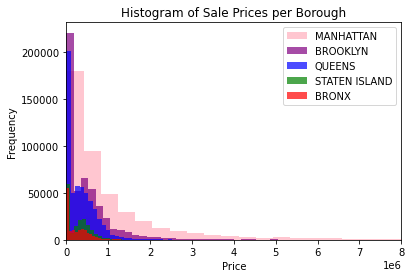

In [291]:
# Plot histogram of sale prices per borough
plt.hist(borough_clean_data["MANHATTAN"]["SALE PRICE"], bins=10000, label="MANHATTAN", alpha=0.9, color="pink")
plt.hist(borough_clean_data["BROOKLYN"]["SALE PRICE"], bins=5000, label="BROOKLYN", alpha=0.7, color="purple")
plt.hist(borough_clean_data["QUEENS"]["SALE PRICE"], bins=5000, label="QUEENS", alpha=0.7, color="blue")
plt.hist(borough_clean_data["STATEN ISLAND"]["SALE PRICE"], bins=2000, label="STATEN ISLAND", alpha=0.7, color="green")
plt.hist(borough_clean_data["BRONX"]["SALE PRICE"], bins=2000, label="BRONX", alpha=0.7, color="red")
plt.xlim([0,0.8e7])
plt.title("Histogram of Sale Prices per Borough")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Mean, Median, Min, Max - Per Borough


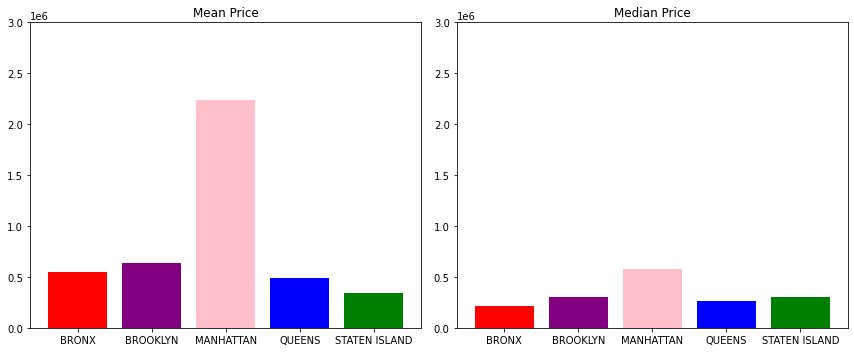

Minimum Prices
BOROUGH_NAME
BRONX            0.0
BROOKLYN         0.0
MANHATTAN        0.0
QUEENS           0.0
STATEN ISLAND    0.0
Name: SALE PRICE, dtype: float64

Maximum Prices
BOROUGH_NAME
BRONX            1.372983e+08
BROOKLYN         8.696129e+08
MANHATTAN        4.111112e+09
QUEENS           5.249157e+08
STATEN ISLAND    1.894423e+08
Name: SALE PRICE, dtype: float64


In [292]:
# Plot bar graphs of sale prices per borough
print("Mean, Median, Min, Max - Per Borough")
print("="*100)
mean_price_b, median_price_b, min_price_b, max_price_b = get_saleprice_stats_groupby(data, "BOROUGH_NAME")

fig, ax = plt.subplots(1,2, figsize=(12, 5), tight_layout = True)
min_ylim = 0
max_ylim = 3e6
# Mean Prices for Boroughs
ax[0].bar(mean_price_b.index, mean_price_b.values, color=["red", "purple", "pink", "blue", "green"])
ax[0].set_title("Mean Price")
ax[0].set_ylim([min_ylim, max_ylim])
# Median Prices for Boroughs
ax[1].bar(median_price_b.index, median_price_b.values, color=["red", "purple", "pink", "blue", "green"])
ax[1].set_title("Median Price")
ax[1].set_ylim([min_ylim, max_ylim])
plt.show()
# Minimum Prices for Boroughs
print("Minimum Prices")
print(min_price_b)
print()
# Maximum Prices for Boroughs
print("Maximum Prices")
print(max_price_b)



##### 2. By Neigherborhood

In [293]:
print("Number of Neighborhoods: ", len(data["NEIGHBORHOOD"].unique()))
print("Names of Neighborhoods:\n", sorted(data["NEIGHBORHOOD"].unique()))

Number of Neighborhoods:  267
Names of Neighborhoods:
 ['1021', '1026', '3004', '3019', 'AIRPORTJFK', 'AIRPORTLAGUARDIA', 'ALPHABETCITY', 'ANNADALE', 'ARDENHEIGHTS', 'ARROCHAR', 'ARROCHAR-SHOREACRES', 'ARVERNE', 'ASTORIA', 'BATHBEACH', 'BATHGATE', 'BAYCHESTER', 'BAYRIDGE', 'BAYSIDE', 'BEDFORDPARK/NORWOOD', 'BEDFORDSTUYVESANT', 'BEECHHURST', 'BELLEHARBOR', 'BELLEROSE', 'BELMONT', 'BENSONHURST', 'BERGENBEACH', 'BLOOMFIELD', 'BOERUMHILL', 'BOROUGHPARK', 'BREEZYPOINT', 'BRIARWOOD', 'BRIGHTONBEACH', 'BROADCHANNEL', 'BRONX-UNKNOWN', 'BRONXDALE', 'BRONXPARK', 'BROOKLYN-UNKNOWN', 'BROOKLYNHEIGHTS', 'BROWNSVILLE', 'BULLSHEAD', 'BUSHTERMINAL', 'BUSHWICK', 'CAMBRIAHEIGHTS', 'CANARSIE', 'CARROLLGARDENS', 'CASTLEHILL/UNIONPORT', 'CASTLETONCORNERS', 'CHELSEA', 'CHINATOWN', 'CITYISLAND', 'CITYISLAND-PELHAMSTRIP', 'CIVICCENTER', 'CLINTON', 'CLINTONHILL', 'CLOVELAKES', 'CO-OPCITY', 'COBBLEHILL', 'COBBLEHILL-WEST', 'COLLEGEPOINT', 'CONCORD', 'CONCORD-FOXHILLS', 'CONEYISLAND', 'CORONA', 'COUNTRYCLUB', 'C

Mean, Median - Per Neighborhood


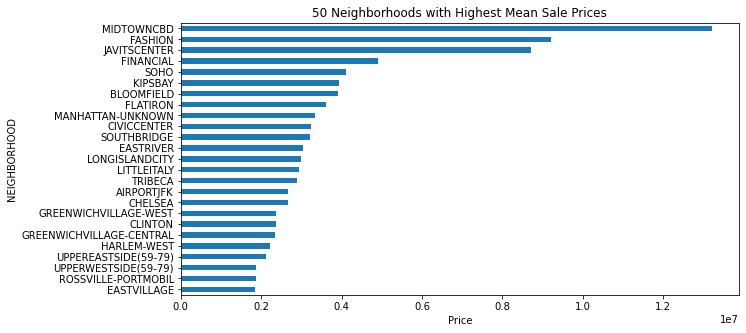

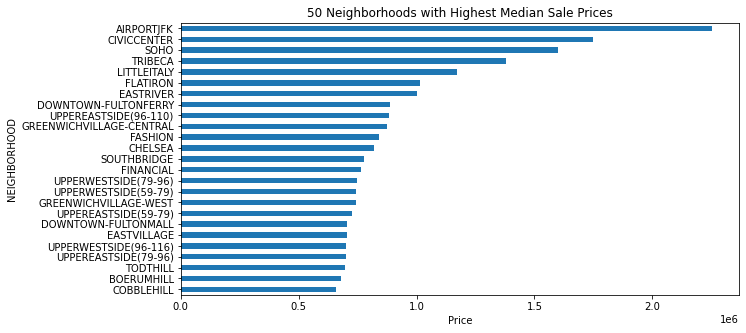

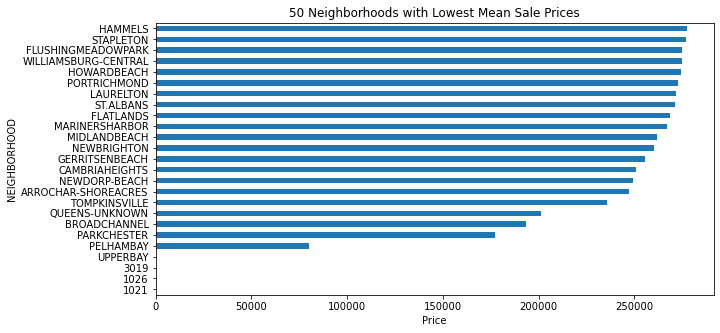

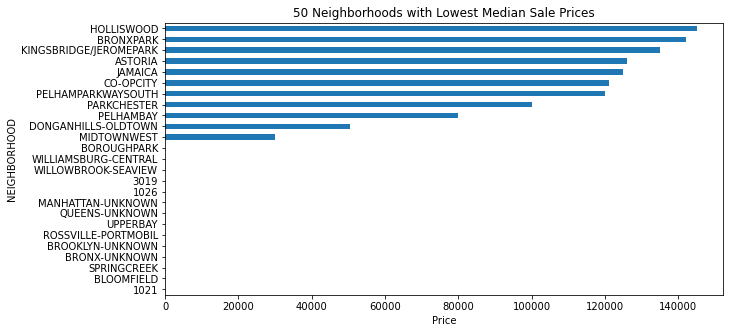

In [294]:
# Plot bar graphs of sale prices per for most/least expensive neighborhoods
print("Mean, Median - Per Neighborhood")
print("="*100)
mean_price_n, median_price_n, _, _ = get_saleprice_stats_groupby(data, "NEIGHBORHOOD")
mean_price_n = mean_price_n.sort_values(ascending=True)
median_price_n = median_price_n.sort_values(ascending=True)
n = 25
figsize = (10,5)

# Highest Mean Sales Prices
fig = plt.figure(figsize=figsize)
mean_price_n[-n:].plot(kind='barh')
plt.title("50 Neighborhoods with Highest Mean Sale Prices")
plt.xlabel("Price")
plt.show()

# Highest Median Sales Prices
fig = plt.figure(figsize=figsize)
median_price_n[-n:].plot(kind='barh')
plt.title("50 Neighborhoods with Highest Median Sale Prices")
plt.xlabel("Price")
plt.show()

# Lowest Mean Sales Prices
fig = plt.figure(figsize=figsize)
mean_price_n[:n].plot(kind='barh')
plt.title("50 Neighborhoods with Lowest Mean Sale Prices")
plt.xlabel("Price")
plt.show()

# Lowest Median Sales Prices
fig = plt.figure(figsize=figsize)
median_price_n[:n].plot(kind='barh')
plt.title("50 Neighborhoods with Lowest Median Sale Prices")
plt.xlabel("Price")
plt.show()


#### (b) Sales over 2003-2022

#### How Borough Prices have changed overtime

In [295]:
# Get mean and median data per borough, grouped by sale year
borough_mean_data = {}
borough_median_data = {}
for borough in borough_names:
    mean_price, median_price, _, _ = get_saleprice_stats_groupby(borough_clean_data[borough], "SALE YEAR")
    borough_mean_data[borough] = mean_price
    borough_median_data[borough] = median_price

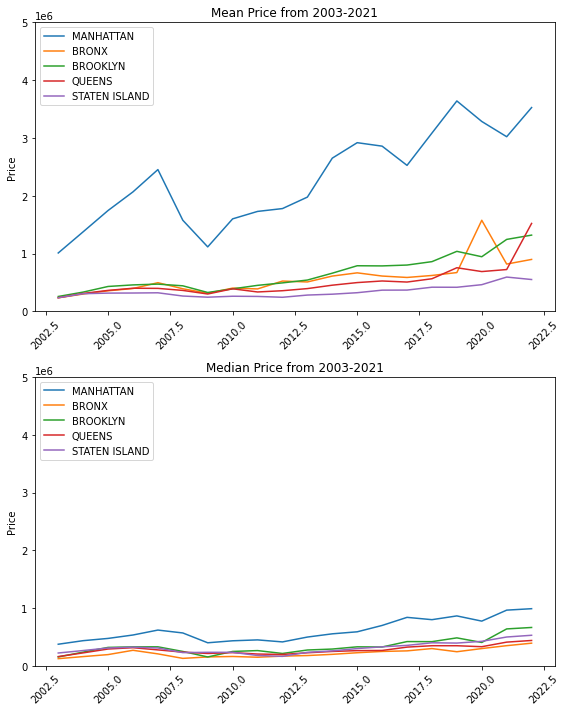

In [296]:
# Plot Mean and Median sale prices over the years, per borough
figsize = (8,10)
fig, ax = plt.subplots(2, 1, figsize=figsize, tight_layout = True)
min_ylim = 0
max_ylim = 5e6

# Mean Prices for Manhattan
for borough in borough_names:
    ax[0].plot(borough_mean_data[borough], label=borough)
ax[0].set_title("Mean Price from 2003-2021")
ax[0].set_ylabel("Price")
ax[0].set_ylim([min_ylim, max_ylim])
plt.sca(ax[0])
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Median Prices for Manhattan
for borough in borough_names:
    ax[1].plot(borough_median_data[borough], label=borough)
ax[1].set_title("Median Price from 2003-2021")
ax[1].set_ylabel("Price")
ax[1].set_ylim([min_ylim, max_ylim])
plt.sca(ax[1])
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.show()

#### How Neighborhood Prices have changed overtime

In [297]:
# TODO